My paper link 1:https://journals.sagepub.com/doi/pdf/10.1177/01655515211007746?casa_token=3wzG66NFy2gAAAAA:vbGcbwbAagdpqZ8hGnDOJjATNOKL8uG6x0nac_7kTjtAtCcEnJs9BC59qydvVfLvdU1hkugVesFjaA

My paper link2:https://dl.acm.org/doi/pdf/10.1145/3411764.3445753

The goal of this colab is to scrape the website https://www.politifact.com and build a dataset containing fake and real news using Python and the BeautifulSoup library.

***Install the required packages:***

In [ ]:
! pip install beautifulsoup4
! pip install requests

***Import the dependencies:***

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import urllib.request
import time

***Create variables for storing the scraped data:***

In [ ]:
authors = []
dates = []
statements = []
sources = []
targets = []

***Function to scrape the website:***

In [ ]:
def scrape_politifact(page_number):
  # Form the URL and make a request to get the data
  page_num = str(page_number) # Convert page number to a string
  URL = 'https://www.politifact.com/factchecks/list/?page='+page_num # append the page number form the URL
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, "html.parser")
  
  # Get the tag and their class
  statement_footer =  soup.find_all('footer',attrs={'class':'m-statement__footer'})
  statement_quote = soup.find_all('div', attrs={'class':'m-statement__quote'}) 
  statement_meta = soup.find_all('div', attrs={'class':'m-statement__meta'})
  target = soup.find_all('div', attrs={'class':'m-statement__meter'}) 
  # Loop the footer class m-statement__footer to get the date and author
  for i in statement_footer:
    link1 = i.text.strip()
    name_and_date = link1.split()
    first_name = name_and_date[1]
    last_name = name_and_date[2]
    full_name = first_name+' '+last_name
    month = name_and_date[4]
    day = name_and_date[5]
    year = name_and_date[6]
    date = month+' '+day+' '+year
    dates.append(date)
    authors.append(full_name)
  # Loop through div m-statement__quote to get the link
  for i in statement_quote:
    link2 = i.find_all('a')
    statements.append(link2[0].text.strip())
  # Loop through div m-statement__meta to get the source
  for i in statement_meta:
    link3 = i.find_all('a') #Source
    source_text = link3[0].text.strip()
    sources.append(source_text)
  #Loop through the target to get the facts about the statement (True or False)
  for i in target:
    fact = i.find('div', attrs={'class':'c-image'}).find('img').get('alt')
    targets.append(fact)

***Scrape the data:***

In [ ]:
# Loop through the pages to scrape the data
n=81
for i in range(1, n):
  scrape_politifact(i)

***Look at the scraped data:***

In [ ]:
#Create a new dataFrame 
data = pd.DataFrame(columns = ['author',  'statement', 'source', 'date', 'target'])


data['author'] = authors
data['statement'] = pd.Series(statements)
data['source'] = pd.Series(sources)
data['date'] = dates
data['target'] = pd.Series(targets)
#Show the data set
data

,author,statement,source,date,target
0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true
1,Samantha Putterman,The Vatican owns a telescope called Lucifer.,Facebook posts,"November 22, 2021",false
2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false
3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true
4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true
...,...,...,...,...,...
2395,Ciara O'Rourke,“Kamala Harris is the prosecutor who refused t...,Viral image,"August 14, 2020",false
2396,Eric Litke,Says Biden supports a school choice ban that w...,Facebook posts,"August 14, 2020",false
2397,Madlin Mekelburg,Says in Texas the “average age of the Republic...,Gene Wu,"August 14, 2020",false
2398,Tom Kertscher,Says Kamala Harris “advocated for restoring vo...,Nancy Mace,"August 14, 2020",barely-true


***Convert the data to binary and get only true and false values:***

In [ ]:
def convert_to_binary(text):
  if text == 'true':
    return 1
  else:
    return 0

def get_real_or_fake(text):
  if text == 'true':
    return 'REAL'
  else:
    return 'FAKE'

***Store the data in a DataFrame and show it:***

In [ ]:
data['BinaryTarget'] = data['target'].apply(convert_to_binary)
data['BinaryNumTarget'] = data['target'].apply(get_real_or_fake)
data

,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true,0,FAKE
1,Samantha Putterman,The Vatican owns a telescope called Lucifer.,Facebook posts,"November 22, 2021",false,0,FAKE
2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false,0,FAKE
3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true,0,FAKE
4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true,0,FAKE
...,...,...,...,...,...,...,...
2395,Ciara O'Rourke,“Kamala Harris is the prosecutor who refused t...,Viral image,"August 14, 2020",false,0,FAKE
2396,Eric Litke,Says Biden supports a school choice ban that w...,Facebook posts,"August 14, 2020",false,0,FAKE
2397,Madlin Mekelburg,Says in Texas the “average age of the Republic...,Gene Wu,"August 14, 2020",false,0,FAKE
2398,Tom Kertscher,Says Kamala Harris “advocated for restoring vo...,Nancy Mace,"August 14, 2020",barely-true,0,FAKE


***Save the data to a CSV:***

In [ ]:
data.to_csv('politifact_scraped_data.csv')

# Factor 3: Reality level

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy
import seaborn as sns
import warnings
import tensorflow as tf
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Upload the csv file from local browser
from google.colab import files
uploaded = files.upload()

Saving politifact_scraped_data.csv to politifact_scraped_data (3).csv


In [ ]:
data=pd.read_csv("politifact_scraped_data.csv")
data.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true,0,FAKE
1,1,Samantha Putterman,The Vatican owns a telescope called Lucifer.,Facebook posts,"November 22, 2021",false,0,FAKE
2,2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false,0,FAKE
3,3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true,0,FAKE
4,4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true,0,FAKE


In [ ]:
data.shape

(2400, 8)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score

from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.dummy import DummyClassifier


from wordcloud import WordCloud, STOPWORDS

import string
from matplotlib import style

In [ ]:
import re
def clean_text_round1(statement):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    statement = statement.lower()
    #text = re.sub('\w*\d\w*', ' ', text)
    statement = re.sub('\n', ' ', statement)
    statement = re.sub('  ', ' ', statement)
    statement = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    statement = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', statement)
    statement = re.sub('\[.*?\]', ' ', statement)
    statement = re.sub('[%s]' % re.escape(string.punctuation), '', statement)
    statement = re.sub('“','',statement)
    statement = re.sub('”','',statement)
    statement = re.sub('’','',statement)
    statement = re.sub('–','',statement)
    statement = re.sub('‘','',statement)
    
    return statement

In [ ]:
data.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true,0,FAKE
1,1,Samantha Putterman,The Vatican owns a telescope called Lucifer.,Facebook posts,"November 22, 2021",false,0,FAKE
2,2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false,0,FAKE
3,3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true,0,FAKE
4,4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true,0,FAKE


In [ ]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!"))
    return final

In [ ]:
data['statement'] = data['statement'].apply(remove_punctuation)

data.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true,0,FAKE
1,1,Samantha Putterman,The Vatican owns a telescope called Lucifer,Facebook posts,"November 22, 2021",false,0,FAKE
2,2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false,0,FAKE
3,3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true,0,FAKE
4,4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true,0,FAKE


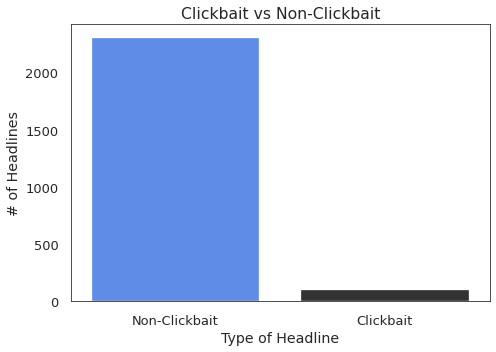

In [ ]:
#class variable countplot
#visualizing class frequency of dataset
sns.set_style('white')
plt.figure(figsize=(7,5))
fig1=sns.countplot(data['BinaryTarget'], alpha =.80, palette= ['#1a66ff','black'])
plt.title('Clickbait vs Non-Clickbait')
plt.ylabel('# of Headlines')
plt.xlabel('Type of Headline')
fig1.set(xticklabels=['Non-Clickbait','Clickbait'])
plt.tight_layout()
#plt.savefig('class_dist')
plt.show()

In [ ]:
#creating seperate dataframes for each class
df_cb=data[data['BinaryTarget']==1]
df_noncb=data[data['BinaryTarget']==0]

#creating a list of unique words for each class
cb_list=list(df_cb['statement'])

total_vocab_cb = set()
for word in cb_list:
    total_vocab_cb.update(word)
len(total_vocab_cb)

noncb_list=list(df_noncb['statement'])

total_vocab_noncb = set()
for word in noncb_list:
    total_vocab_noncb.update(word)
len(total_vocab_noncb)

flat_cb = [item for sublist in cb_list for item in sublist]
flat_noncb = [item for sublist in noncb_list for item in sublist]


cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

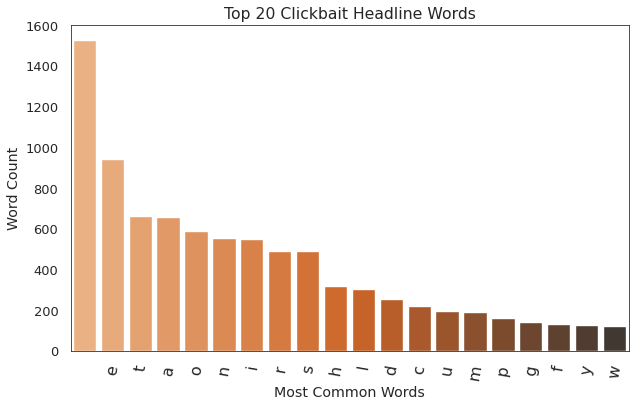

In [ ]:
# create counts of clickbait and non-clickbait words and values
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

#bar plot for top 15 most common clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(cb_bar_words, cb_bar_counts,palette='Oranges_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.savefig('clickbait_20_bar')
plt.show()

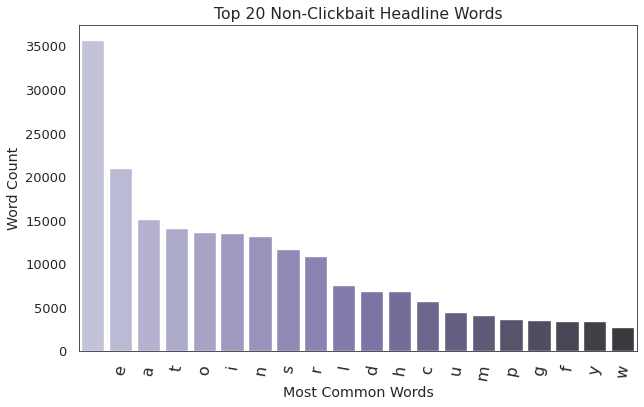

In [ ]:
#bar plot for top 15 most common non-clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(noncb_bar_words, noncb_bar_counts,palette='Purples_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Non-Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

In [ ]:
!pip install wordcloud

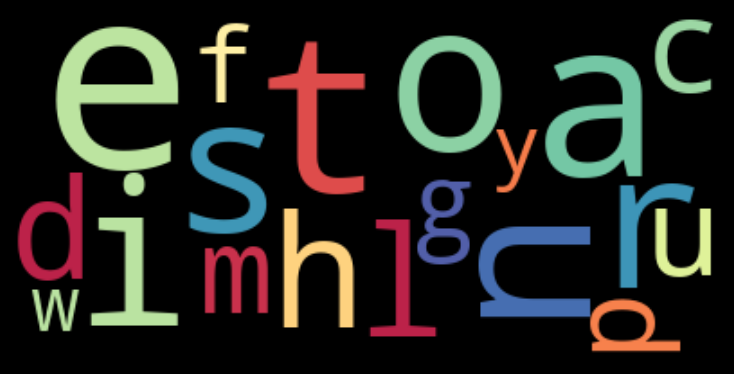

In [ ]:
from wordcloud import WordCloud
clickbait_dictionary = dict(zip(cb_bar_words, cb_bar_counts))
nonclickbait_dictionary = dict(zip(noncb_bar_words, noncb_bar_counts))

# Create the clickbait word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(clickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:

plt.savefig('clickbait_wc')

plt.show()

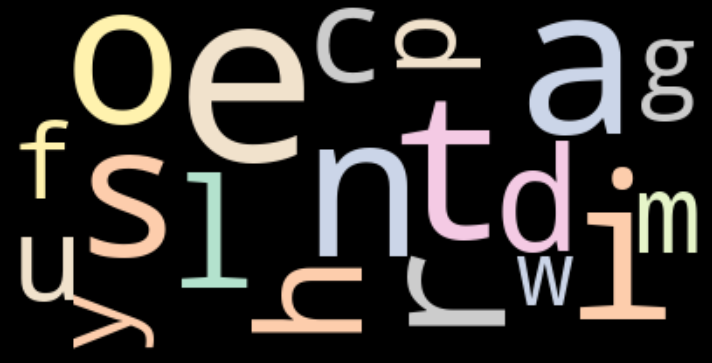

In [ ]:
# Create the non-clickbait word cloud:

wordcloud = WordCloud(colormap='Pastel2').generate_from_frequencies(nonclickbait_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
plt.tight_layout()
plt.savefig('nonclickbait_wc')

plt.show()

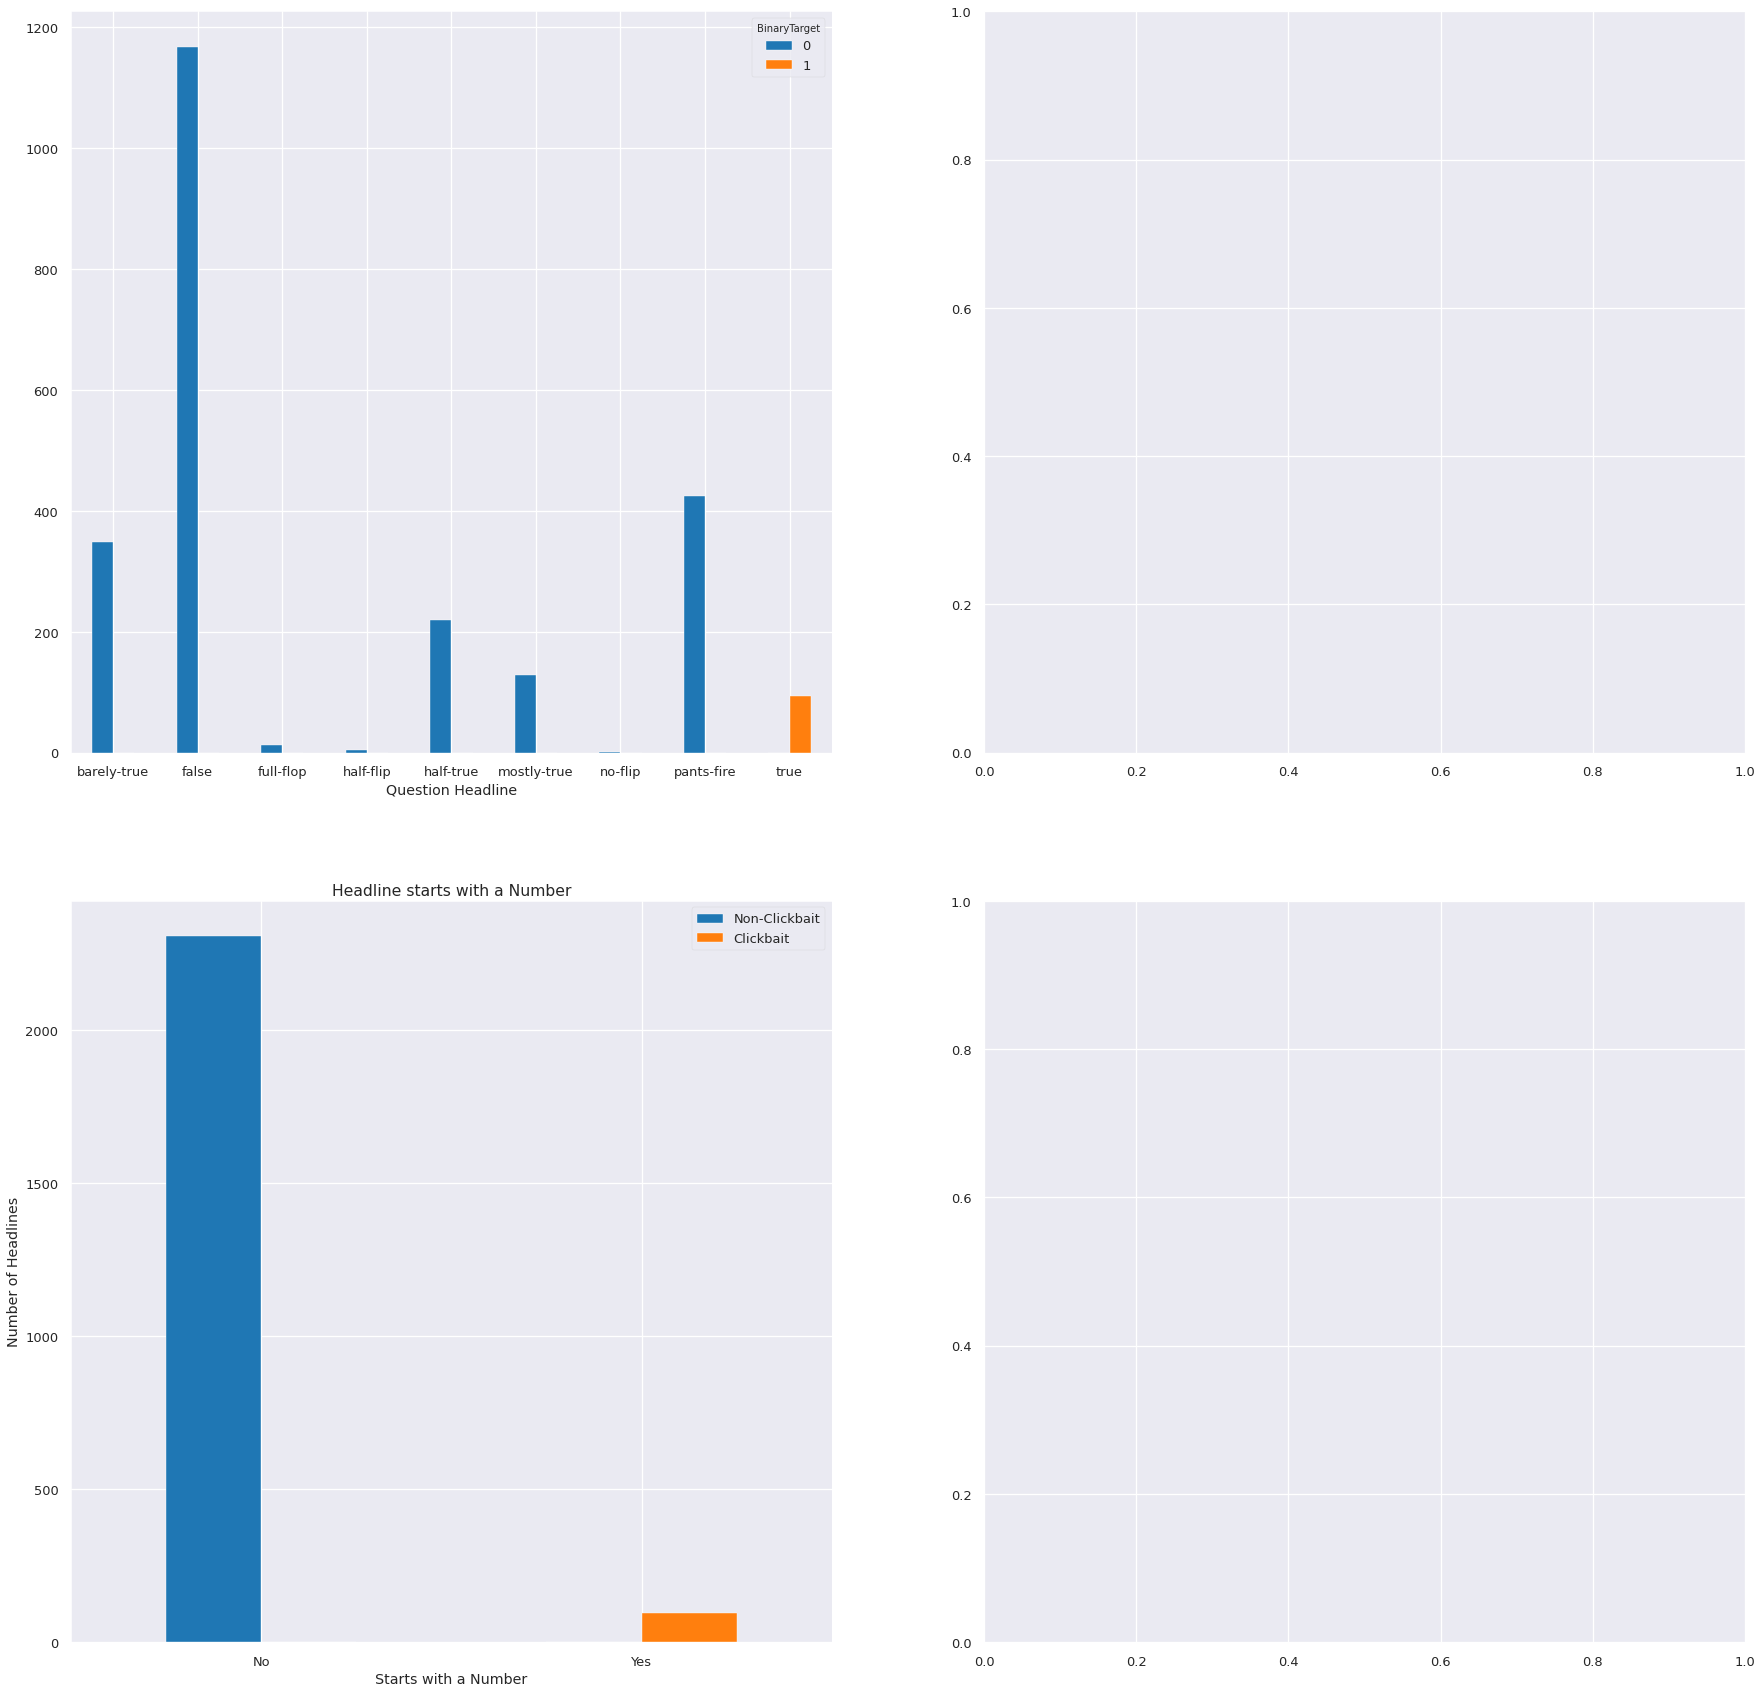

In [ ]:
#plotting engineered features to compare by class 
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))

plot = data.groupby('target')['BinaryTarget'].value_counts().unstack().plot.bar(ax=axes[0,0], rot=0)
plot.set_xlabel('Question Headline')




plot = data.groupby('BinaryNumTarget')['BinaryTarget'].value_counts().unstack().plot.bar(ax=axes[1,0], rot=0)
plot.set_xlabel('Starts with a Number')
plot.set_ylabel('Number of Headlines')
plot.legend(title=None,labels=['Non-Clickbait','Clickbait'])
plot.set(xticklabels=['No','Yes'])
plot.set_title('Headline starts with a Number')





plt.show()

In [ ]:
engineered_feats=data.drop(columns='statement')


engineered_feats.corr()

,Unnamed: 0,BinaryTarget
Unnamed: 0,1.000000,0.009412
BinaryTarget,0.009412,1.000000


In [ ]:
data.shape

(2400, 8)

In [ ]:
data.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
0,0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true,0,FAKE
1,1,Samantha Putterman,The Vatican owns a telescope called Lucifer,Facebook posts,"November 22, 2021",false,0,FAKE
2,2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false,0,FAKE
3,3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true,0,FAKE
4,4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true,0,FAKE


In [ ]:
data['score'] = data['target'].apply(lambda x: '1' if x in ['true', 'mostly-true', 'half-true','barely-true'] else '0')
data.head(10)

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget,score
0,0,Monique Curet,The media televised the trial of Kyle Rittenho...,Facebook posts,"November 22, 2021",barely-true,0,FAKE,1
1,1,Samantha Putterman,The Vatican owns a telescope called Lucifer,Facebook posts,"November 22, 2021",false,0,FAKE,0
2,2,Andy Nguyen,President Joe Biden will “control health care ...,Facebook posts,"November 22, 2021",false,0,FAKE,0
3,3,Lauren White,Ashley Hinson’s and Mariannette Miller-Meeks’ ...,Dave Loebsack,"November 22, 2021",half-true,0,FAKE,1
4,4,Madison Czopek,“The FBI is using its counterterrorism divisio...,Facebook posts,"November 19, 2021",barely-true,0,FAKE,1
5,5,Jon Greenberg,“If you or your family spends $28 a day — prep...,Kevin McCarthy,"November 19, 2021",false,0,FAKE,0
6,6,Bill McCarthy,Photos showed “bricks everywhere” in Kenosha d...,Facebook posts,"November 19, 2021",false,0,FAKE,0
7,7,Monique Curet,“German News Agency Tracks 75 Prominent Athlet...,Bloggers,"November 19, 2021",false,0,FAKE,0
8,8,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,"• November 19,",true,1,REAL,1
9,9,Ciara O'Rourke,COVID-19 vaccines contain luciferase,Bloggers,"November 19, 2021",false,0,FAKE,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X = data['BinaryTarget']
y = data['score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
scaler = StandardScaler()
scale = scaler.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [ ]:
score = accuracy_score(y_test,pred)
score

0.7145833333333333

In [ ]:
from sklearn.metrics import classification_report
confusion_matrix(y_test,pred)

array([[326,   0],
       [137,  17]])

In [ ]:
matrix = classification_report(y_test,pred)
print('classification_report: \n',matrix)

classification_report: 
               precision    recall  f1-score   support

           0       0.70      1.00      0.83       326
           1       1.00      0.11      0.20       154

    accuracy                           0.71       480
   macro avg       0.85      0.56      0.51       480
weighted avg       0.80      0.71      0.63       480



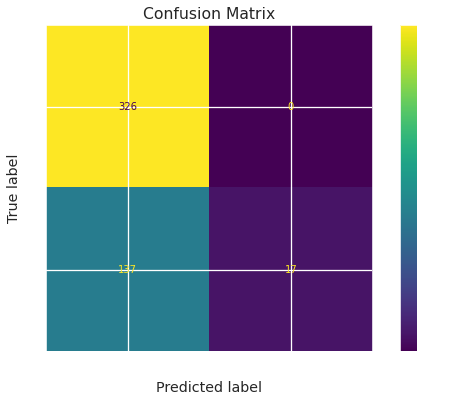

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(knn_clf,X_test,y_test)
matrix.ax_.set_title('Confusion Matrix')


plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()